In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hatches = ['+', 'x', 'o', '.', '*',"/"]

def plot(filename,title,ylim,ylabel):
    df=pd.read_csv(filename)
    df = df.sort_values(['group', 'name'],ascending = [True, True])
    # print(df.to_latex(index=False))
    # sns.set(rc={'figure.figsize':(6,2)})
    plt.figure(figsize=(6,3))
    plt.ylim(0,ylim)
    ax=sns.barplot(df, edgecolor="black",x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel",)
    # ax.set(xlabel ="", ylabel = ylabel, title =title,labelpad=15)
    ax.set_ylabel(ylabel,  labelpad=10)
    ax.set_xlabel("",  labelpad=105)

    for container in ax.containers:
        labels=ax.bar_label(container, rotation="vertical",padding=3)
        for label in labels:
            label.set_fontsize(8)
            label.set_color("gray")
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(0.5, -.35),
        ncol=3,
        title=None, frameon=False,
    )
    for i, container in enumerate(ax.containers):
        for patch in container.patches:
            patch.set_hatch(hatches[i % len(hatches)])
    plt.savefig(f"report/img/{title}.pdf", bbox_inches='tight')

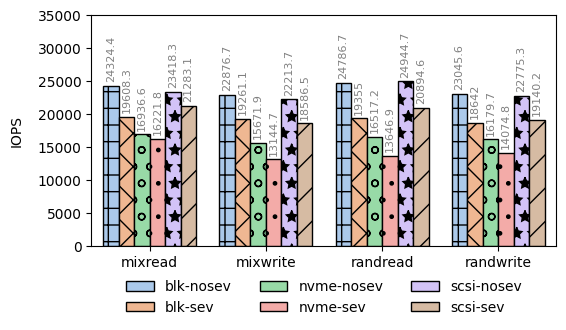

In [ ]:
plot("benchmarks/iops_results.csv", title="iops", ylim=35000, ylabel="IOPS")

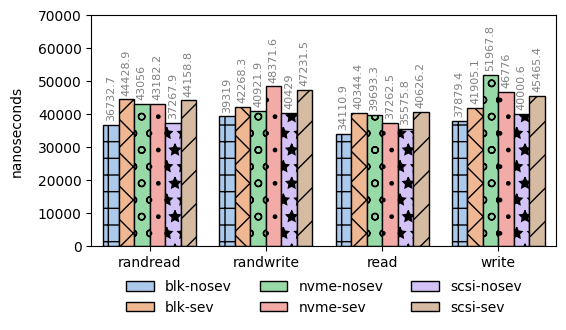

In [ ]:
plot("benchmarks/al_results.csv",title='al',ylim=70000,ylabel="nanoseconds")

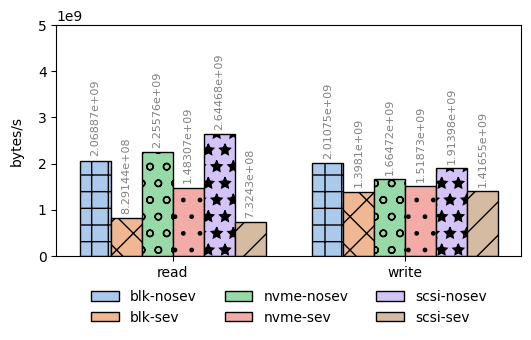

In [ ]:
plot("benchmarks/bw_results.csv",title='bw',ylim=5000000000,ylabel="bytes/s")

In [ ]:
def plot_ratios(filename):
    df=pd.read_csv(filename)
    print(df.to_latex())

In [ ]:
plot_ratios("benchmarks/bw-ratios.csv")
plot_ratios("benchmarks/al-ratios.csv")
plot_ratios("benchmarks/iops-ratios.csv")

\begin{tabular}{lllr}
\toprule
 & group & name & result \\
\midrule
0 & read & blk & 0.400772 \\
1 & read & nvme & 0.657459 \\
2 & read & scsi & 0.276944 \\
3 & write & blk & 0.695312 \\
4 & write & nvme & 0.912306 \\
5 & write & scsi & 0.740106 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllr}
\toprule
 & group & name & result \\
\midrule
0 & randread & blk & 1.209520 \\
1 & randread & nvme & 1.002932 \\
2 & randread & scsi & 1.184902 \\
3 & randwrite & blk & 1.075011 \\
4 & randwrite & nvme & 1.182046 \\
5 & randwrite & scsi & 1.168258 \\
6 & read & blk & 1.182743 \\
7 & read & nvme & 0.938761 \\
8 & read & scsi & 1.141962 \\
9 & write & blk & 1.106275 \\
10 & write & nvme & 0.900095 \\
11 & write & scsi & 1.136616 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllr}
\toprule
 & group & name & result \\
\midrule
0 & mixread & blk & 0.806119 \\
1 & mixread & nvme & 0.957797 \\
2 & mixread & scsi & 0.908825 \\
3 & mixwrite & blk & 0.841954 \\
4 & mixwrite & nvme & 0.838740 \\
5 & mixw